=========================================================================================================================

## Surface Integrals of Vector Fields ##

**With Python SymPy**

The next Examples and Practice Problems and their images come from **Paul Dawkins** excellent lecture 
notes: http://tutorial.math.lamar.edu/index.aspx, where you can the find the underlying theory of calculations and the detailed 'paper and pen' solutions. To use this material you must read *'Terms of Use'* from https://tutorial.math.lamar.edu/Terms.aspx. 

====================================================================================================================

 **The surface integral** of a **vector function** $\vec{F}(\vec{r})$  is given by
 $$  \iint_S \vec{F} \cdot \vec{dS}  = \iint_S \vec{F} \cdot \vec{n } dS =  
\iint_S \vec{F}(\vec{r}(u,v)) \cdot \left(\frac{d\vec{r}}{du} \times \frac{d\vec{r}} {dv}\right) du dv, $$
 
where *u* and *v* are the surface variables.  This is also know as the **flux** of the vector field $\vec{F}$ across the surface $S$.

Note that we must write the unit vector in the **correct orientation** to meet the requirements of the problem (see theory).

=====================================================================================================================

In the following solutions we see three different formalisms/methods: **&nbsp; Sympy Matrix,  &nbsp;  Vectors in
CoordSys3D('C') &nbsp; and &nbsp; ParametricRegion.**




In [1]:
# INIT
import numpy as np
import sympy as sp
x, y, z, G = sp.symbols('x y z G', real=True)
from sympy import sin, cos, exp, pi, symbols
from sympy.abc import r, x, y, z, theta, phi
from sympy.vector import CoordSys3D, ParametricRegion,  vector_integrate
from sympy.vector import *
C = CoordSys3D('C')
#import matplotlib.pyplot as plt
#from scipy.integrate import quad
#from scipy.integrate import quad_vec

#x, y, z = sp.symbols('x y z')
#x, y, z, c1, c2, c3, t, p = sp.symbols('x y z c1 c2, c3 t  p')


**Example 1.** Evaluate   $ \iint_{S_1} \vec{F} \cdot \vec{dS} $   where  $ \vec{F} = y\vec{j} - z\vec{k} $   and $S_1$  is the surface given by the paraboloid  $y = x^2 + z^2 $, &nbsp; $   0 ≤ y ≤ 1 $   and the disk $S_2$:   $ x^2 +z^2 ≤ 1 $ at $y = 1.$      Assume that S has positive orientation.

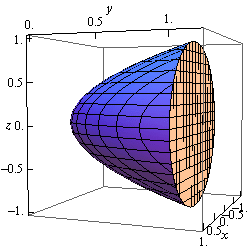

**S1: The Paraboloid**

**Ex1. solution 1  for $S_1$: Using matrix representation**

In [2]:
# INPUT
# Select the 3D coordinate system to use; Cylindrical, Spherical, Parabolic, ...):
# Define the variables and functions for your coordinate system:
rho, the = sp.symbols(r'\rho \theta', pos=True, real=True)              # variables
x, y, z, = sp.symbols('x y z ', cls=sp.Function, real=True)             # functions

# Define 3D coordinate transformations from <x,y,z> (x and z are transformed to polar coordinates in xz-plane)
# In the flux formula we have chosen the surface parameters u and v to be r and theta.
x = rho*sp.cos(the)
y = rho**2
z = rho*sp.sin(the)

# Set the limits of the surface parameters:
lim = [(the, 0, 2*sp.pi), (rho, 0, 1)]  

# Set the vectorfield <x,y,z) coordinate functions for field F (Fluid velocity, electric field, magnetic field, ...)
F = sp.Matrix([0, y, -z])      
#...................................................................................

# CALCULATE
r = sp.Matrix([x, y, z])                                                # Position vector to the surface points 
integrand = F.dot(sp.diff(r,rho).cross(sp.diff(r,the))).simplify()      # F*(dr/dϕ)x(dr/dφ) (* = dot)
integrand

flux = sp.integrate(integrand, lim[0], lim[1] )                         # Integration with limits
# OR  flux = vector_integrate(integrand , lim[0], lim[1])
#....................................................................................
# OUTPUT
print('The flux across S1 is')
flux 

The flux across S1 is


-pi

:::::::::::::::::::::::::::::::

**Ex1. solution 2  for $S_1$: Using vector representation**

In [3]:
rho, the = sp.symbols( r'\rho \theta',  real=True)                       # variables
x, y, z, = sp.symbols('x y z ', real=True)                               # variables

r = C.x*C.i + C.y*C.j + C.z*C.k                                          # position vector
F = C.y*C.j - C.z*C.k                                                    # vectorfield

# Coordinate transformations 
r = r.subs([(C.x, rho*sp.cos(the)), (C.y, rho**2), (C.z, rho*sp.sin(the))])            
F = F.subs([(C.x, rho*sp.cos(the)), (C.y, rho**2), (C.z, rho*sp.sin(the))])              
             
integrand  = F.dot(sp.diff(r,rho).cross(sp.diff(r,the))).simplify()      # F*(dr/dϕ)x(dr/dφ) (* = dot)
lim = [(the, 0, 2*sp.pi), (rho, 0, 1)]                                   # integration limits

flux = sp.integrate(integrand , lim[0], lim[1] )                         # integration with limits
#  OR flux = vector_integrate(integrand , lim[0], lim[1])
print('The flux across S1 is'); flux


The flux across S1 is


-pi

:::::::::::::::::::::::::::::::::::

**Ex1. solution 3  for $S_1$: Using SymPy's ParametricRegion method.**

In [4]:
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, ImplicitRegion, vector_integrate
from sympy.abc import r, x, y, z, theta, phi
C = CoordSys3D('C')

# Area definition: Tuple to define base scalars in terms of parameters  and 
# the lower and upper bounds for integration parameters.
S1 = ParametricRegion((r*cos(theta), r**2, r*sin(theta)),\
                         (r, 0, 1), (theta, 0, 2*pi))

# Vector field in vector form as a parameter representation
F =  r**2*C.j - r*sin(theta)*C.k

flux = vector_integrate(F, S1)
print('The flux across S1 is')
flux

The flux across S1 is


-pi

===============================

**S2:  The Cap of the Paraboloid**

**Ex1. solution 1 for $S_2$: Using matrix formulation**

In [5]:
# INPUT
# Define 3D coordinate transformations from <x,y,z>
# Polar coordinates at the distance 1 in y-direction:
x = rho*sp.cos(the)                                          # ρcos(Θ)
y = 1
z = rho*sp.sin(the)                                          # ρsin(Θ)
                        
# Set the limits of the integration:
lim = [(the, 0, 2*sp.pi), (rho, 0, 1)]  
# Set the vectorfield (Fluid velocity, electric or magnetic field, ...)
F = sp.Matrix([0, y, -z])      

# CALCULATE
r = sp.Matrix([x, y, z])                                      # Position vector 
integrand = F.dot(sp.diff(r,the).cross(sp.diff(r,rho)))       # F.(dr/dΘ)x(dr/dρ)     
flux = sp.integrate(integrand, lim[0], lim[1] )               # Integration with limits

# OUTPUT
print('The flux across S2 is')
flux 

The flux across S2 is


pi

::::::::::::::::::::::::::::::::::::::::::

**Ex1. solution 2  for $S_2$: Using vector representation**

$$ Flux  = \iint_S \vec{F} \cdot \vec{n } dS $$

In [6]:
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, ImplicitRegion, vector_integrate
from sympy.abc import r, x, y, z, theta, phi
C = CoordSys3D('C')

In [7]:
n = C.j                              # In the direction of positive y-axis
F = y*C.j - z*C.k                    # Vector field presented in CoordSys3D('C') 
Fn = F.dot(n)                        # The integrand  F.n
Fn

y

We have $\vec{F} \cdot \vec{n } = y = 1$ in the cap and the area is the area of a circle of radius 1. So the flux will be only the area of this circle and we can use *ParametricRegion function* to calculate it. 

In [8]:
cap_circle = ParametricRegion((r*cos(theta), r*sin(theta)), (r, 0, 1), (theta, 0, 2*pi))
print('The flux across S2 is')
vector_integrate(1, cap_circle)

The flux across S2 is


pi

::::::::::::::::::::::::::::::::::::::::::

**Ex1. solution 3  for $S_2$: Using SymPy's ParametricRegion method.**

In [9]:
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, ImplicitRegion, vector_integrate
from sympy.abc import r, x, y, z, theta, phi
C = CoordSys3D('C')

# Area definition: Tuple to define base scalars <x,y,z> in terms of parameters (r and theta) and 
# the lower and upper bounds for integration parameters.
S2 = ParametricRegion((r*cos(theta), 1, r*sin(theta)),\
                        (theta, 0, 2*pi), (r, 0, 1))

# Vector field in vector form as a parameter representation
F =  C.j - r*sin(theta)*C.k                                         # CoordSys3D('C')
flux = vector_integrate(F, S2)
print('The flux across S2 is')
flux

The flux across S2 is


pi

 =============================================================================================

**Example 2.** Evaluate the flux $ \iint_S \vec{F} \cdot \vec{dS} $ where $ \vec{F} = x\vec{i} + y\vec{i} + z^4\vec{k} $ and *S*, which is the upper half of the sphere 
$x^2 + y^2 + z^2 = 9 $ and the disk $x^2 + y^2 = 9$ in the plane *z = 0*. Assume that 
S has the positive orientation.

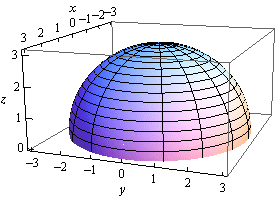

**The Semisphere $S_1$.**   We use the spherical coordinates $(\rho, \theta, \phi)$ and calculate the flux from the integral
$$ \iint_{S_1} \vec{F} \cdot \vec{dS} = \iint_{S_1} \vec{F} \cdot \vec{n } dS =\iint_{S_1} F(\vec{r}(u,v)) \cdot (\frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv})  du dv, $$ 
 where $\rho = 3$ , $u = \theta$ and $ v = \phi.$ 
 
**Solution 1  for $S_1$: using matrix representation**

In [10]:
# INPUT
# Select the 3D coordinate system to use; Cylindrical, Spherical, Parabolic, ...):
# Define the variables and functions for your coordinate system:
rho, the, phi = sp.symbols(r'\rho \theta \phi', pos=True, real=True)    # variables
x, y, z, = sp.symbols('x y z ', cls=sp.Function, real=True)             # functions

# Define 3D coordinate transformations from <x,y,z> --> ?
# Spherical coordinates: 
x = 3*sp.sin(the)*sp.cos(phi)                                           
y = 3*sp.sin(the)*sp.sin(phi)
z = 3*sp.cos(the)

# Make the choice of  surface/integration variables u and v:
u = the
v = phi
sbs = (rho, 3)                                                          # This limits the 3D space to the spherical surface
# Set the limits of the integration (defines a upper half portion of the sphere surface):
lim = [(the, 0, sp.pi/2), (phi, 0, 2*sp.pi)]  

# Set the vectorfield (Fluid velocity, electric or magnetic field, ...)
F = sp.Matrix([x, y, z**4])      


# CALCULATE
r = sp.Matrix([x, y, z])                                                # Position vector 
integrand = F.dot(sp.diff(r,u).cross(sp.diff(r,v))).simplify()          # F.(dr/dϕ)x(dr/dφ)  

flux = sp.integrate(integrand, lim[0], lim[1] )                         # Integration with limits
flux = flux.subs([sbs])                                                 # rho get its value 3


# OUTPUT
print('The flux across S1 is')
flux 


The flux across S1 is


279*pi

In [11]:
# Let's look at the variables
#x
#u
#F1
#r
sp.diff(r,u)
#integrand


Matrix([
[3*cos(\phi)*cos(\theta)],
[3*sin(\phi)*cos(\theta)],
[         -3*sin(\theta)]])

:::::::::::::::::::::::::::::::::::::::::

**Solution 2  for $S_1$:  using ParametricRegion method.**

In [12]:
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, ImplicitRegion, vector_integrate
from sympy.abc import a, r, x, y, z, theta, phi
C = CoordSys3D('C')

In [13]:
# Area definition: Tuple of length 3 to define base scalars x,y,z in terms of parameters and
# then the lower and upper bounds of these parameters.
semisphere = ParametricRegion((3*sin(theta)*cos(phi), 3*sin(theta)*sin(phi), 3*cos(theta)),\
                             (theta, 0, pi/2), (phi, 0, 2*pi))
#print(semisphere.dimensions)    

A = 3*sin(theta)*cos(phi)*C.i  + 3*sin(theta)*sin(phi)*C.j + (3*cos(theta))**4*C.k          # Vectorfield parametrized
flux = vector_integrate(A, semisphere)

print('The flux is')
flux

The flux is


279*pi

===============

**The Bottom of the Hemi-Sphere**. Here we know that $\vec{n} = -\vec{k}$ and use the formula

$$ \iint_S \vec{F} \cdot \vec{dS} = \iint_S \vec{F} \cdot \vec{n }dS.$$

The flux is easily calculated in Cartesian Coordinates

In [14]:
x, y, z = sp.symbols('x y z', real=True)

F = sp.Matrix([x, y, z**4])
n = sp.Matrix([0, 0, -1])
Fn = F.dot(n)                                     # Integrand  F.n
Fn

-z**4

In the xy -plane, where  *z = 0*,  the z component ($z^4)$ of field *F*  is zero and the field has no  component in the z direction. The field vectors lie in the xy plane.  The flux across S2 is

$$ \iint_{S_2} \vec{F} \cdot \vec{n } dS =  \iint_{S_2} -z^4 dS = \iint_{S_2} 0 dS  = 0$$


==================================================================================================================

**Problem 1.** Evaluate the flux  $ \iint_S \vec{F} \cdot \vec{dS} $  where  $ \vec F = 3x\,\vec i + 2z\,\vec j + \left( {1 - {y^2}} \right)\vec k $  and *S* is the portion of $z = 2 - 3y + {x^2}$ that lies over the triangle in the
xy-plane with vertices (0,0), (2,0) and (2,-4) oriented in the negative z-axis direction.

Region $D$ is the projection of the region $S$ in the $xy$-plane.
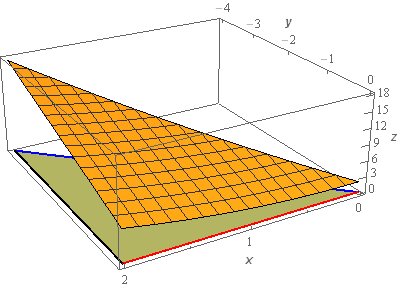

According to theory (https://tutorial.math.lamar.edu/Classes/CalcIII/SurfIntVectorField.aspx)

\begin{align*}\iint\limits_{S}{{\vec F\centerdot d\vec S}} & = \iint\limits_{S}{{\vec F\centerdot \vec n\,dS}}\\ &  = \iint\limits_{D}{{\left( {P\,\vec i + Q\,\vec j + R\,\vec k} \right)\centerdot \left( {\frac{{ - {g_x}\,\vec i - {g_y}\,\vec j + \vec k}}{{\sqrt {{{\left( {{g_x}} \right)}^2} + {{\left( {{g_y}} \right)}^2} + 1} }}} \right)}}\sqrt {{{\left( {{g_x}} \right)}^2} + {{\left( {{g_y}} \right)}^2} + 1} \,dA\\ &  = \iint\limits_{D}{{\left( {P\,\vec i + Q\,\vec j + R\,\vec k} \right)\centerdot \left( { - {g_x}\,\vec i - {g_y}\,\vec j + \vec k} \right)}}\,dA\\ & \end{align*}

where  $z = g\left( {x,y} \right)$ and assumed the “upward” orientation. We’d needed the “downward” orientation, and  we would need to change the signs on the normal vector. 

**Prbl 1. solution 1: Using matrix representation**

In [15]:
g =  x**2 - 3*y + 2                                 # z = g(x,y)
gx = sp.diff(g, x )
gy = sp.diff(g, y )
gg = -sp.Matrix([-gx, -gy, 1])                       # - sign because of the negative orientation 

F = sp.Matrix([3*x, 2*g, 1-y**2])                   # In y-coordinate z is substituted by z = g(x,y) 
integrand = F.dot(gg).simplify()
integrand


y**2 + 18*y - 13

In [16]:
lim = [(y, -2*x, 0), (x, 0, 2)]  
flux = sp.integrate(integrand, lim[0], lim[1] ) 
flux

-412/3

:::::::::::::::::::::::::::::::

**Prbl 1. solution 2: Using ParametricRegion method.**

In [17]:
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, vector_integrate
from sympy.abc import a, r, x, y, z, theta, phi
C = CoordSys3D('C')

In [18]:
triangle = ParametricRegion((x, y, x**2 - 3*y + 2),   (x, 0, 2), (y, -2*x, 0))   # <x,y,z> expressed as parameters x and y
F = 3*C.x*C.i + 2*C.z*C.j + (1 -C.y**2)*C.k                                      # Vector field in CoordSys3D('C')
flux = vector_integrate(F, triangle)
flux 

-412/3

======================================================================================================================

**Problem 2.** Evaluate the flux $ \, \iint_S \vec{F} \cdot \vec{dS} \,\, $  where  $ \,\, \vec F = -x\,\vec i + 2y\,\vec j -z\,\vec k \,$  and *S* is the portion of $y = 3{x^2} + 3{z^2}$ that lies behind $y = 6$ oriented in the positive y-axis direction. Note that the surface in this problem is only the elliptic paraboloid and does not include the “cap” at y = 6.


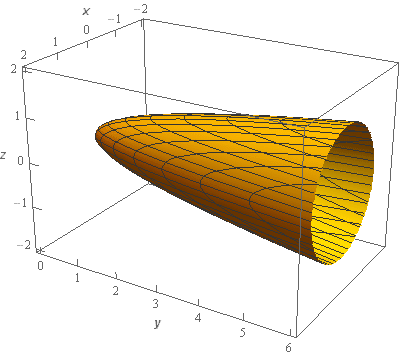


The equation of the surface is $\,\,f\left( {x,y,z} \right) = 3{x^2} + 3{z^2} - y = 0. \,\,$

At  $y = 6$  we have $ \,\,6 = 3{x^2} + 3{z^2}\hspace{0.2in} \Rightarrow \hspace{0.2in}{x^2} + {z^2} = 2$.
So the radius of the circle at $\, y = 6\,$ is $\,\sqrt{2}\,.$  Here it is favorable to use the polar coordinate system for integration. We set
$$ x = r\cos \theta \hspace{0.2in}\hspace{0.2in}z = r\sin \theta \hspace{0.2in}\hspace{0.2in}{x^2} + {z^2} = {r^2} $$

and the limits of the polar variables are
$ \, \, 0 \le \theta  \le 2\pi,  \hspace{0.2 in} 0 \le r \le \sqrt 2. $




In [19]:
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, vector_integrate, gradient
from sympy.abc import r, x, y, z, theta, phi
C = CoordSys3D('C')

In [20]:
f = 3*C.x**2 + 3*C.z**2 - C.y                                                   # From the equation of the surface S
grd_f = gradient(f)                                                             # The gradient of f  is normal to S
print( 'The gradient (normal) of surface S is')
grd_f

The gradient (normal) of surface S is


6*C.x*C.i + (-1)*C.j + 6*C.z*C.k

We see that the y-component of the gradient ( $-\vec{j}$) points to the negative y-axis direction. But according to the problem statement it should point to the positive direction. We need to take this into account by changing the sign of the normal (or at the latest by changing the sign of the result).

**Prbl 2. solution 1: Using matrix representation**

In [21]:
rho, the = sp.symbols(r'\rho \theta', pos=True, real=True)              # variables
x, y, z, = sp.symbols('x y z ', cls=sp.Function, real=True)             # functions

In [22]:
# Coordinate transformations 
x = rho*sp.cos(the)                                                     # xz-polar coordinates
y = 3*rho**2                                                            # for the paraboloid
z = rho*sp.sin(the)                                                     # xz-polar coordinates

F = sp.Matrix([-x, 2*y, -z])                                            # vectorfield
r = sp.Matrix([x, y, z])                                                # position vector
crss = sp.diff(r,rho).cross(sp.diff(r,the))                             # The cross product of the position vector deriva-
crss                                                                    # tives gives us the normal of the surface S.

Matrix([
[                     6*\rho**2*cos(\theta)],
[-\rho*sin(\theta)**2 - \rho*cos(\theta)**2],
[                     6*\rho**2*sin(\theta)]])

Also here we can see that the y-component of the normal (the middle component) points to the negative y-axis direction. So we have to change the sign of the cross product.

In [23]:
integrand = F.dot(-crss).simplify()                                           # Obs! -crss for the correct orientation
flux = sp.integrate(integrand, (rho, 0, sp.sqrt(2)), (the, 0, 2*sp.pi) )      # Integration with limits
flux

24*pi

:::::::::::::::::::::::::::::::

**Prbl 2. solution 2: Using vector representation**

In [24]:
rho, the = sp.symbols( r'\rho \theta',  real=True)                              # variables
x, y, z, = sp.symbols('x y z ', real=True)                                      # variables

r =  C.x*C.i + C.y*C.j + C.z*C.k                                                # position vector in CoordSys3D('C')
F = -C.x*C.i + 2*C.y*C.j - C.z*C.k                                              # vectorfield in CoordSys3D('C')
                
r = r.subs([(C.x, rho*sp.cos(the)), (C.y, 3*rho**2), (C.z, rho*sp.sin(the))])   # position vector parameterized (rho, the)
F = F.subs([(C.x, rho*sp.cos(the)), (C.y, 3*rho**2), (C.z, rho*sp.sin(the))])   # vectorfield parameterized     (rho, the)

crs = sp.diff(r,rho).cross(sp.diff(r,the)).simplify()                           # The cross product of the position vector..
crs                                                                             # derivatives gives us the normal.

(6*\rho**2*cos(\theta))*C.i + (-\rho)*C.j + (6*\rho**2*sin(\theta))*C.k

Here we see again that the y-component of the normal  $(−𝜌 \vec{j}) $ points to the negative y-axis direction. So we have to change the sign of the cross product.

In [25]:
integrand = F.dot(-crs).simplify()                                               # Obs! -crs for the correct orientation
flux = vector_integrate(integrand , (the, 0, 2*sp.pi), (rho, 0, sp.sqrt(2)))     # integration with limits
#   OR: flux = sp.integrate(integrand, (the, 0, 2*sp.pi), (rho, 0, sp.sqrt(2)))         

flux

24*pi

::::::::::::::::::::::::::::::::::::::::::

**Prbl 2. solution 3: Using ParametricRegion**

In [26]:
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, vector_integrate, gradient
from sympy.abc import r, x, y, z, theta, phi
C = CoordSys3D('C')


In [27]:
# Area definition: Tuple to define base scalars <x,y,z> in terms of parameters  and 
# the lower and upper bounds for integration.
S = ParametricRegion((r*cos(theta), 3*r**2, r*sin(theta)),\
                          (r,  0, sp.sqrt(2)), (theta, 0, 2*pi) )

# Vector field in vector form as a parameter representation
F = -r*cos(theta)*C.i +  2*3*r**2*C.j - r*sin(theta)*C.k

flux = -vector_integrate(F, S)                      # Note the change of sign to get the correct orientation.
flux

24*pi

======================================================================================================================

**Problem 3.** Evaluate  $ \, \iint_S \vec{F} \cdot \vec{dS} \,\, $  where  $ \,\, \vec F = x^2\,\vec i + 2z\,\vec j -3y\,\vec k \,$  and *S* is the portion of ${y^2} + {z^2} = 4$ between x = 0 and x = 3 - z oriented outwards.

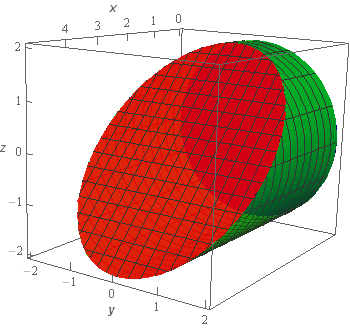

Note that the surface in this problem is only the cylinder itself. The “caps” of the cylinder are not part of this surface despite the red “cap” in the sketch. 

**Solution by ParametricRegion**

In [28]:
from sympy import cos, sin, pi
from sympy.vector import CoordSys3D, ParametricRegion,  vector_integrate
from sympy.abc import x, y, z, r,  theta
C = CoordSys3D('C')


In [29]:
S = ParametricRegion((x, 2*sin(theta), 2*cos(theta)),                     # Surface definition: (x,y,z) parameterization,
                     (x, 0, 3-2*cos(theta)), (theta, 0, 2*pi),)           # limits

F = C.x**2*C.i - 2*2*cos(theta)*C.j - 3*2*sin(theta)*C.k                  # Vector field

vector_integrate(F, S) 


0

=======================================================================================================================

**Problem 4.** Evaluate  $ \, \iint_S \vec{F} \cdot \vec{dS} \,\, $  where  $ \,\, \vec F = \,\vec i + z\,\vec j + 6x\,\vec k \,$  and *S* is the portion of the sphere  of radius 3 with $ x \le 0, y \ge 0$ and $ z \ge 0 $  oriented inward.

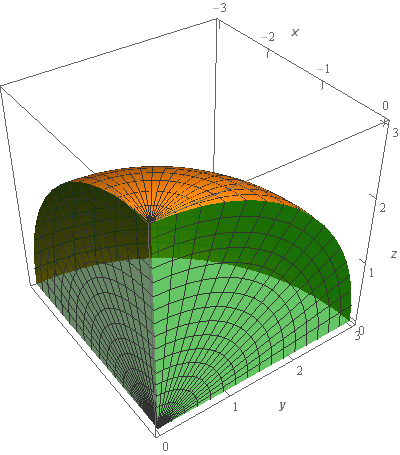

Note that the surface in this problem is only the part of the sphere itself, not the greenish 'edges'. 

In [30]:
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, vector_integrate
from sympy.abc import r, x, y, z, theta, phi
C = CoordSys3D('C')

In [31]:
S = ParametricRegion((3*sin(theta)*cos(phi), 3*sin(theta)*sin(phi), 3*cos(theta)),  # Surface def: (x,y,z) parameterization,
                       (theta, 0, pi/2), (phi, pi/2, pi))                           # limits

F = C.i + C.z*C.j + 6*C.x*C.k                                                       # Vector field

I = -vector_integrate(F, S)                                                 # - sign beacause of inward surface orientation
I                                                                                 

9*pi/4 + 45

=======================================================================================================================

**Problem 5.** Evaluate  $ \, \iint_S \vec{F} \cdot \vec{dS} \,\, $  where  $ \,\, \vec F = \,y\,\vec i + 2x\,\vec j + (z-8)\,\vec k \,$  where $S$ is the surface of the solid bounded by &nbsp; $ 4x + 2y + z = 8 $, &nbsp; z = 0 y = 0 and x = 0. Note that all four surfaces of this solid are included in  $S$.

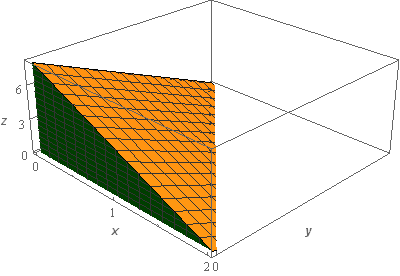

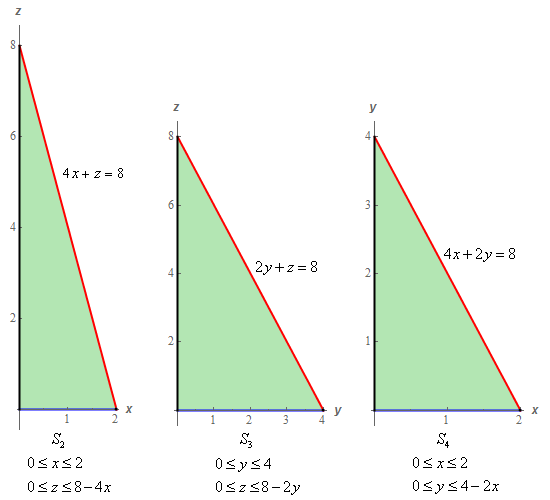

In [32]:
import numpy as np
import sympy as sp
x, y, z = sp.symbols('x y z', real=True)
from sympy.vector import CoordSys3D, ParametricRegion, vector_integrate
C = CoordSys3D('C')

We recall that
 $$  \iint_S \vec{F} \cdot \vec{dS} = \iint_S \vec{F} \cdot \vec{n } dS  = \iint_S \vec{F}(\vec{r}(u,v)) \cdot \left(\frac{d\vec{r}}{du} \times \frac{d\vec{r}} {dv}\right) du dv, $$
 
**S1** Plane given by 4x + 2y + z = 8   (the top of the solid)

**Solution in vector representation.** 
Here the equation of the plane is $f\left( {x,y,z} \right) = 4x + 2y + z - 8 = 0$ and
the normal of the surface  $\vec n =  - \vec j = \left\langle {0, - 1,0} \right\rangle.$
 
 

In [33]:
F = C.y*C.i + 2*C.x*C.j + (C.z-8)*C.k           # Vector field in CoordSys3D('C')
F = F.subs(C.z,  (8 - 4*C.x - 2*C.y))           # Substitution of z from the surface equation leaves two parameters left 
F

C.y*C.i + 2*C.x*C.j + (-4*C.x - 2*C.y)*C.k

In [34]:
r = C.x*C.i + C.y*C.j + (8 - 4*C.x - 2*C.y)*C.k                    # Position vector for the surface S1
dr_dx = sp.diff(r, C.x)                                            # dr/du
dr_dy = sp.diff(r, C.y)                                            # dr/dv
cross = dr_dx.cross(dr_dy)                                         # dr/du x dr/dv
cross

4*C.i + 2*C.j + C.k

In [35]:
integrand1 = F.dot(cross).simplify()
integrand1

2*C.y

In [36]:
I1 = sp.integrate(integrand1, (C.y, 0, 4-2*C.x), (C.x, 0, 2)).simplify()
I1

32/3

**S2** Plane given by y = 0   (the triangle on right side of the solid) 

**Solution with matrices**

In [37]:
F = sp.Matrix([0, 2*x, z - 8])                                          # Vector field is substituted by y = 0
n = sp.Matrix([0, -1, 0])                                               # n = -j,  |n|  = 1 
Fn = F.dot(n)
Fn


-2*x

In [38]:
I2 = sp.integrate(Fn, (z, 0, 8-4*x), (x, 0, 2))                        
I2

-32/3

**S3** Plane given by x = 0 (the triangle at back of the solid  -  not shown in sketch) 

**Solution with ParametricRegion**

In [39]:
S3 = ParametricRegion((0, y, z), (z, 0, 8 - 2*y), (y, 0, 4))            # <x,y,z> as parameters and their limits
F = C.y*C.i  + (C.z - 8)*C.k                                            # Vector field in CoordSys3D('C'), C.x = 0
I3 = vector_integrate(F, S3)
I3

-64/3

**S4** Plane given by z  = 0 (the triangle on bottom of the solid  -  not shown in sketch)

**Solution in vector representation.** 
 $\,\,\,  \iint_S \vec{F} \cdot \vec{dS}  = \iint_S \vec{F} \cdot \vec{n } dS $

In [40]:
F = C.y*C.i + 2*C.x*C.j + (-8)*C.k                                      # Vector field in CoordSys3D('C'), C.z = 0
n = -C.k                                                                # n = -k,  |n|=1
Fn = F.dot(n)
I4 = sp.integrate(Fn, (y, 0, 4-2*x), (x, 0, 2))                         # dS = 1*dA = dydx
I4

32

**The final result**

In [41]:
 # The asked integral 
I = I1 + I2 + I3 + I4                                             
I

32/3

=======================================================================================================================

**Problem 6.** Evaluate  $ \, \iint_S \vec{F} \cdot \vec{dS} \,\, $  where  $ \,\, \vec F = \,yz\,\vec i + x\,\vec j + 3y^2\,\vec k \,$  where $S$ is the surface of the solid bounded by &nbsp; $ x^2 + y^2  = 4 $, &nbsp; $z = x - 3 \,$   and $z = x + 2.$ Note that all three surfaces of this solid are included in $S$.

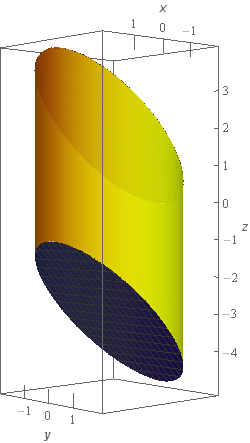

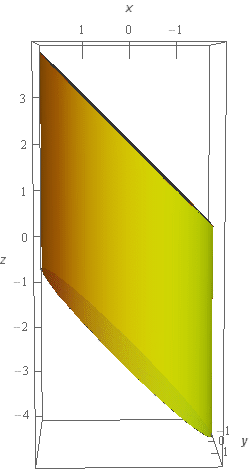

In [42]:
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, vector_integrate, gradient
from sympy.abc import r, x, y, z, theta, phi
C = CoordSys3D('C')

**S1.**   $ {\mbox{ Cylinder given by }}{x^2} + {y^2} = 4\,\,\,\left( {i.e{\mbox{ the walls of the solid}}} \right)$ 

ParametricRegion method

In [43]:
# Area definition: Base scalars <x,y,z> in terms of parameters z and theta (cylindrical coordinates, rho=2)   and
# then corresponding lower and upper bounds of these parameters.
S1 = ParametricRegion((2*cos(theta), 2*sin(theta), z),   
                     (z, 2*cos(theta)-3, 2*cos(theta)+2), (theta, 0, 2*pi)) 

F = C.y*C.z*C.i  + C.x*C.j + 3*C.y**2*C.k                                 # Vector field in CoordSys3D('C')
F
I1 = vector_integrate(F, S1)
I1

0

**S2.**  ${\mbox{ Plane given by }}z = x + 2 \,\,\, {\rm{ }}  \left( {i.e{\mbox{ the top cap of the cylinder}}} \right)$

Vector representation, integration in polar coordinates

In [44]:

F = C.y*C.z*C.i  + C.x*C.j + 3*C.y**2*C.k                   # Vector field in CoordSys3D('C')
F2 = F.subs(C.z, C.x + 2)                                   # Vector field in CoordSys3D('C'), in the plane S2  (z = x+2)
F2                                                         

(C.y*(C.x + 2))*C.i + C.x*C.j + 3*C.y**2*C.k

In [45]:
f2 = C.z - C.x - 2            # The equation for the plane S2: f2 = z - x - 2 = 0
grd = -gradient(f2)           # The gradient gives us the normal. Negative orientation in the problem statement -> (-) sign
integrand2 = F2.dot(grd)      # F.n  There is no need to normalize the normal, see theory.
integrand2                    # in CoordSys3D('C')

-3*C.y**2 + C.y*(C.x + 2)

In [46]:
# For integration, we switch to polar coordinates.
# For area transformation we must include the Jacobian (extra (r) at the end)
integrand2 = (integrand2.subs([(C.y, r*sin(theta)), (C.x, r*cos(theta))]))*(r)     # (Note multible substitions as a list)
integrand2

r*(-3*r**2*sin(theta)**2 + r*(r*cos(theta) + 2)*sin(theta))

In [47]:
I2  = vector_integrate(integrand2, (r, 0, 2), (theta, 0, 2*pi))
I2

-12*pi

**S3.** ${\mbox{ Plane given by }}z = x - 3  \,\,\, {\rm{ }}\left( {i.e{\mbox{ the bottom cap of the cylinder}}} \right)$

**a)** By vector representation, integration in polar coordinates. The solution proceeds as in the previous case of surface S2.

In [48]:
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, vector_integrate, gradient
from sympy.abc import r, x, y, z, theta, phi
C = CoordSys3D('C')

In [49]:
F = C.y*C.z*C.i  + C.x*C.j + 3*C.y**2*C.k                   # Vector field in CoordSys3D('C')
F3 = F.subs(C.z, C.x -3)                                    # Vector field in CoordSys3D('C') in the plane S3  (z = x-3)
F3                                                          

(C.y*(C.x - 3))*C.i + C.x*C.j + 3*C.y**2*C.k

In [50]:
f3 = C.z - C.x + 3            # The equation for the plane S2: f3 = z - x + 3 = 0
grd = gradient(f3)            # The gradient gives us the normal. (correct orientation)
integrand3 = F3.dot(grd)      # F.n  There is no need to normalize the normal, see theory.
integrand3                    # in CoordSys3D('C')

3*C.y**2 - C.y*(C.x - 3)

In [51]:
# For integration, we switch to polar coordinates.
# For area transformation we must include the Jacobian (extra (r) at the end)
integrand3 = (integrand3.subs([(C.y, r*sin(theta)), (C.x, r*cos(theta))]))*(r)     # (Note multible substitions as a list)
integrand3

r*(3*r**2*sin(theta)**2 - r*(r*cos(theta) - 3)*sin(theta))

In [52]:
I3  = vector_integrate(integrand3, (r, 0, 2), (theta, 0, 2*pi))
I3

12*pi

**S3. b)**  By ParametricRegion using polar coordinates.

In [53]:
# Area definition: Base scalars <x,y,z> in polar coordinates (z = x - 3)..  
# and then bounds of the parameters r and theta.
S3 = ParametricRegion((r*cos(theta), r*sin(theta), r*cos(theta) - 3),   
                     (r, 0, 2), (theta, 0, 2*pi)) 

F3 = C.y*C.z*C.i  + C.x*C.j + 3*C.y**2*C.k                                             # Vector field in CoordSys3D('C')
F3 = (F3.subs([(C.y, r*sin(theta)), (C.x, r*cos(theta)), (C.z, r*cos(theta) - 3)]))    # Field to polar coordinates

'Note that here we do not need to explicitly include the Jacobian (r)'

I3 = vector_integrate(F3, S3)
I3

12*pi

**The final result**

In [54]:
# The asked integral 
I = I1 + I2 + I3 
print('I =', I1,'+', I2,'+', I3, '=', I)

I = 0 + -12*pi + 12*pi = 0


======================================

Codes: Heikki Miettinen 2024